## Teoría

Defina y responda 
1. ¿Cuál es la característica más definitoria de una red libre de escala que la diferencia de una red aleatoria (Erdős-Rényi)? Explique por qué esta característica obliga a los modeladores a ir más allá de los modelos que se basan únicamente en propiedades promedio (como el modelo SIR clásico). 

    Lo que hace que una red libre de escala sea diferente a una red aleatoria es que tiene nodos con muchísimas más conexiones que otros, lo que llamamos hubs. En las redes aleatorias, todas las conexiones están más distribuidas de manera uniforme, sin nodos tan importantes con tantas conexiones. Esto significa que los modelos como el SIR clásico, que se basan solo en promedios, no sirven tan bien para redes libres de escala porque no toman en cuenta el impacto que los hubs tienen en la propagación de algo como una enfermedad.

2. Considere la fórmula de la ley de potencia vista en clase. ¿Qué implica un valor menor de gamma (por 
ejemplo, 2,1 frente a 3,5) sobre la prevalencia de nodos altamente conectados en la red? 

    Cuando el valor de gamma es bajo, como 2.1 en lugar de 3.5, significa que la red tiene muchos más nodos con grados muy altos (es decir, están muy conectados). Esto quiere decir que hay más nodos clave, que se vuelven los “hubs” de la red, lo que cambia mucho la dinámica comparado con una red donde estos nodos altamente conectados son pocos o casi inexistentes.

3. ¿Por qué el número reproductivo básico R0 para una enfermedad que se propaga en una red libre de escala depende de la varianza de la distribución de grados, no solo de la media? 

    En una red libre de escala, el número reproductivo básico 𝑅0 depende de la varianza de los grados porque los nodos que están muy conectados (hubs) tienen un mayor impacto en la propagación de una enfermedad. Si solo miramos la media de las conexiones, no veríamos cuán importantes son estos nodos centrales. La varianza nos da una idea de la desigualdad en el número de conexiones, lo que es crucial para entender cómo se va a propagar una enfermedad.

4. ¿Por qué las intervenciones dirigidas (p. ej., centrar las pruebas, el uso de mascarillas o la vacunación en los centros de la red) son particularmente eficaces y eficientes en una red sin escala en comparación con una red aleatoria? Explíquelo desde una perspectiva matemática y práctica. 

    Las intervenciones dirigidas, como vacunar a los nodos más conectados, funcionan mucho mejor en redes libres de escala que en redes aleatorias porque esos hubs juegan un papel muy importante en cómo se propaga una enfermedad. Si nos enfocamos en estos nodos con muchas conexiones, podemos frenar la propagación de manera más eficiente, ya que estos nodos son los que conectan con más personas. En una red aleatoria, no hay nodos tan centrales, por lo que una intervención generalizada no tendría el mismo impacto.

## Ejercicio práctico

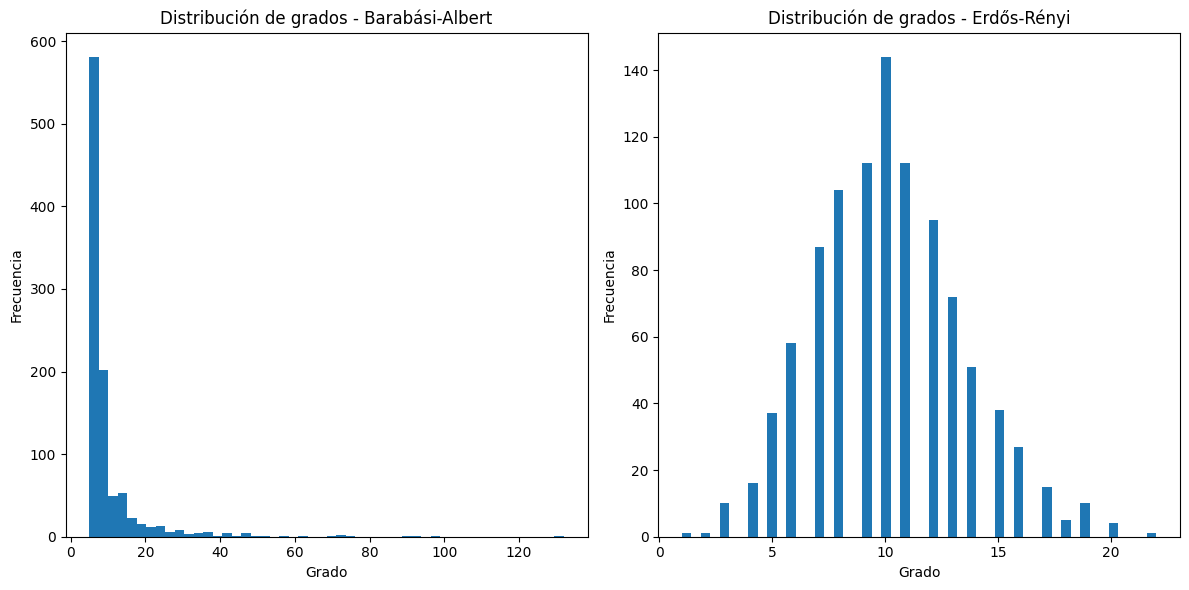

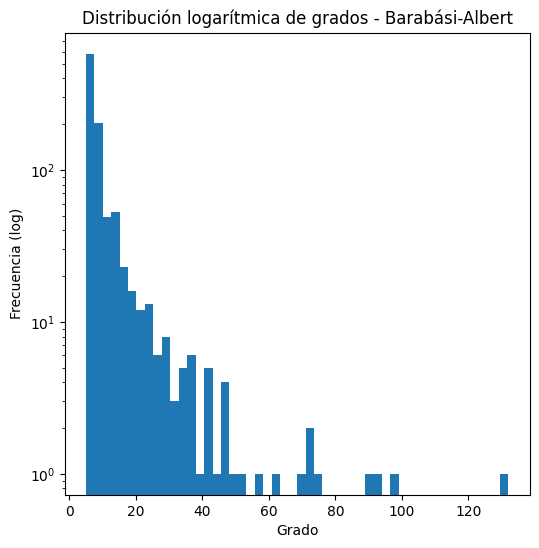

Red Barabási-Albert: Media = 9.95, Varianza = 104.11350000000002
Red Erdős-Rényi: Media = 10.18, Varianza = 10.6296


In [1]:
# Importación de bibliotecas necesarias
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
n = 1000  # Número de nodos
m = 5  # Número de conexiones por nodo nuevo

# 1. Generación de la red sin escala (Barabási-Albert)
G_ba = nx.barabasi_albert_graph(n, m)

# 2. Generación de la red aleatoria (Erdős-Rényi)
p = (2 * m) / (n - 1)  # Probabilidad de conexión
G_er = nx.erdos_renyi_graph(n, p)

# 3. Obtención de los grados de los nodos
ba_degrees = [d for n, d in G_ba.degree()]
er_degrees = [d for n, d in G_er.degree()]

# 4. Visualización de las distribuciones de grados en escala lineal
plt.figure(figsize=(12, 6))

# Histograma de la red Barabási-Albert
plt.subplot(121)
plt.hist(ba_degrees, bins=50)
plt.title("Distribución de grados - Barabási-Albert")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

# Histograma de la red Erdős-Rényi
plt.subplot(122)
plt.hist(er_degrees, bins=50)
plt.title("Distribución de grados - Erdős-Rényi")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# 5. Visualización de la distribución de grados en escala logarítmica (solo para la red sin escala)
plt.figure(figsize=(6, 6))
plt.hist(ba_degrees, bins=50, log=True)
plt.title("Distribución logarítmica de grados - Barabási-Albert")
plt.xlabel("Grado")
plt.ylabel("Frecuencia (log)")
plt.show()

# 6. Cálculo de la media y la varianza de las distribuciones de grados
mean_ba = np.mean(ba_degrees)
var_ba = np.var(ba_degrees)

mean_er = np.mean(er_degrees)
var_er = np.var(er_degrees)

print(f"Red Barabási-Albert: Media = {mean_ba}, Varianza = {var_ba}")
print(f"Red Erdős-Rényi: Media = {mean_er}, Varianza = {var_er}")


Distribución de grados en escala lineal: La red Barabási-Albert mostrará una distribución sesgada con algunos nodos de grado muy alto (hubs), mientras que la red Erdős-Rényi tendrá una distribución más uniforme.

Distribución logarítmica: El gráfico logarítmico de la red Barabási-Albert debe ser aproximadamente lineal, confirmando que sigue una ley de potencias, donde los nodos de alto grado son menos frecuentes pero mucho más conectados que los nodos de grado bajo.

Media y varianza: La red Barabási-Albert tendrá una mayor varianza, lo que refleja una mayor dispersión en el número de conexiones entre los nodos. Esto es importante para modelar la propagación de epidemias, ya que los hubs pueden actuar como superpropagadores.

Según tu análisis, si se introdujera un nuevo patógeno en cada una de estas redes sintéticas, ¿cuál tendría más probabilidades de causar una epidemia rápida y a gran escala? Explica por qué, haciendo referencia a la estructura de red que observaste. 

Si se introdujera un nuevo patógeno en ambas redes, la red Barabási-Albert (sin escala) tendría más probabilidades de causar una epidemia rápida y a gran escala debido a la presencia de hubs altamente conectados, que actúan como superpropagadores, facilitando la transmisión del patógeno a un gran número de nodos rápidamente. En contraste, la red Erdős-Rényi (aleatoria) tiene una distribución de grados más uniforme, lo que significa que no existen nodos con tantas conexiones y la propagación sería más lenta y menos concentrada. La presencia de estos hubs en la red sin escala permite que la enfermedad se difunda mucho más rápidamente que en la red aleatoria, donde la propagación se da de manera más equitativa entre los nodos.

último Prompt solicitado:
"Explícame cómo se genera una red sin escala usando el modelo Barabási-Albert y una red aleatoria con el modelo Erdős-Rényi en Python, y cómo comparar sus distribuciones de grados usando la librería networkx"

Por qué me funcionó?:
Este prompt fue efectivo para mí porque cubre tanto la teoría como la implementación práctica de los conceptos clave que estaba trabajando en el laboratorio. Me ayudó a entender cómo generar redes complejas (Barabási-Albert y Erdős-Rényi) y a comparar sus distribuciones de grados, lo cual es fundamental para el análisis de redes. Además, el uso de networkx para implementar y analizar las redes me dio herramientas concretas para visualizar y estudiar las diferencias estructurales entre ellas, permitiéndome aplicar los conocimientos teóricos en un contexto práctico.